In [1]:
!uv pip install jupyterlab-vim

Using Python 3.12.4 environment at: C:\Users\RBO\repos\masknmf-toolbox\.venv
Resolved 93 packages in 108ms
Installed 1 package in 19ms
 + jupyterlab-vim==4.1.4


In [4]:
import masknmf
from pathlib import Path
import fastplotlib as fpl
import tifffile
import numpy as np

Image(value=b'version https://git-lfs.github.com/spec/...', height='55', width='300')

Valid,Device,Type,Backend,Driver
✅ (default),NVIDIA RTX A4000,DiscreteGPU,Vulkan,560.94
✅,NVIDIA RTX A4000,DiscreteGPU,D3D12,
✅,NVIDIA RTX A4000,DiscreteGPU,D3D12,
❗ limited,Microsoft Basic Render Driver,CPU,D3D12,
❌,NVIDIA RTX A4000/PCIe/SSE2,Unknown,OpenGL,4.6.0 NVIDIA 560.94


In [9]:
def load_from_dir(plane_dir):
    """
    Load all result files generated by `run_plane` from a given plane directory.

    Returns
    -------
    dict
        Dictionary with the following keys:

        - 'moco': np.ndarray
              Motion-corrected data array.

        - 'pmd_demixer': object
              Deserialized PMD demixer object containing the full demixing state.

        - 'a': np.ndarray
              Spatial components array with shape (height, width, n_components).
              Each component is a 2D spatial footprint.

        - 'c': np.ndarray
              Temporal components array with shape (n_frames, n_components).
              Each column is a time series for one component.
    """
    plane_dir = Path(plane_dir).expanduser()

    results = {}
    moco_path = plane_dir / "data_reg.npy"
    pmd_demixer_path = plane_dir / "pmd_demixer.npy"
    a_path = plane_dir / "a.npy"
    c_path = plane_dir / "a.npy"

    if moco_path.exists():
        results["moco"] = np.load(moco_path, allow_pickle=True)
    if pmd_demixer_path.exists():
        results["pmd_demixer"] = np.load(pmd_demixer_path, allow_pickle=True).item()
    if a_path.exists():
        results["a"] = np.load(a_path)
    if c_path.exists():
        results["c"] = np.load(c_path)
    return results

In [10]:
raw_files[-3]

WindowsPath('D:/tests_bigmem/roi2/plane7.tif')

In [11]:
# raw data
from pathlib import Path
raw_files = [x for x in Path(r"D:\tests_bigmem\roi2").glob("*.tif*")]

In [ ]:
fpath = raw_files[-3]
data = tifffile.memmap(fpath)

results = load_from_dir(f"D:/tests_bigmem/roi2/masknmf/{fpath.stem}")
reg = results["moco"]

reg_pre = tifffile.memmap(r"D:\tests_bigmem\no_phase\roi2\plane7.tif")

mean_raw = np.mean(data, axis=0)
mean_sub = data - mean_raw

mean_reg = np.mean(reg, axis=0)
mean_sub_reg = reg - mean_reg

In [62]:
data.shape

(5632, 448, 224)

RFBOutputContext()

JupyterRenderCanvas(css_height='300.0px', css_width='500.0px')
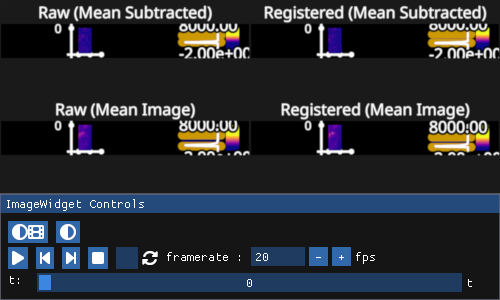

In [45]:
iw = fpl.ImageWidget(
    data=[mean_sub, mean_sub_reg, mean_raw, mean_reg],
    names=["Raw (Mean Subtracted)", "Registered (Mean Subtracted)", "Raw (Mean Image)", "Registered (Mean Image)"],
    graphic_kwargs={"vmin": -2, "vmax": 8000},
    figure_shape=(2,2),
    histogram_widget=True,
)
iw.show()

In [47]:
iw.window_funcs = {"t": (np.mean, 0)}

C:\Users\RBO\repos\masknmf-toolbox\.venv\Lib\site-packages\fastplotlib\widgets\image_widget\_widget.py:86: UserWarning: Invalid 'window size' value for function: <function mean at 0x000001B8DD679580>, setting 'window size' = None for this function. Valid values are integers >= 3.
  warn(


In [51]:
iw.close()

RFBOutputContext()

JupyterRenderCanvas(css_height='300.0px', css_width='500.0px')
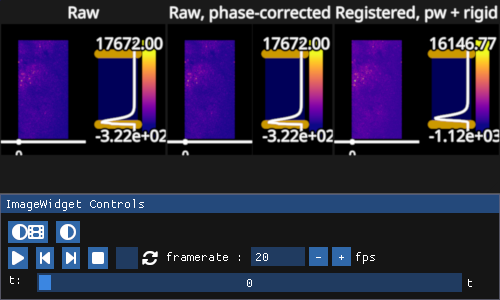

In [60]:
iw = fpl.ImageWidget(
    data=[reg_pre, data,reg],
    names=["Raw", "Raw, phase-corrected", "Registered, pw + rigid"],
    figure_shape=(1, 3),
    histogram_widget=True,
)
iw.show()

In [50]:
iw.close()

RFBOutputContext()

JupyterRenderCanvas(css_height='300.0px', css_width='500.0px')
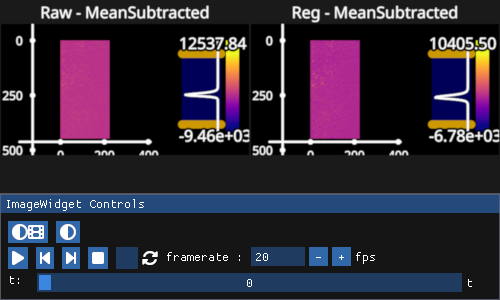

In [61]:
iw = fpl.ImageWidget(
    data=[mean_sub, mean_sub_reg],
    names=["Raw - MeanSubtracted", "Reg - MeanSubtracted"],
    histogram_widget=True,
)
iw.show()

In [14]:
iw.close()

## PMD Videos

In [49]:
results = load_from_dir(f"D:/tests_bigmem/roi2/masknmf/{fpath.stem}")
pmdarr = results["pmd_demixer"].results
pmdarr.ac_array

KeyError: 'pmd_demixer'

## Plane 10

In [13]:
raw_files[0]
fpath = raw_files[0]
results_p10 = load_from_dir(f"D:/tests_bigmem/roi2/masknmf/{fpath.stem}")

RFBOutputContext()

C:\Users\RBO\repos\masknmf-toolbox\.venv\Lib\site-packages\fastplotlib\graphics\features\_base.py:18: UserWarning: casting float64 array to float32
  warn(f"casting {array.dtype} array to float32")


JupyterRenderCanvas(css_height='300.0px', css_width='500.0px')
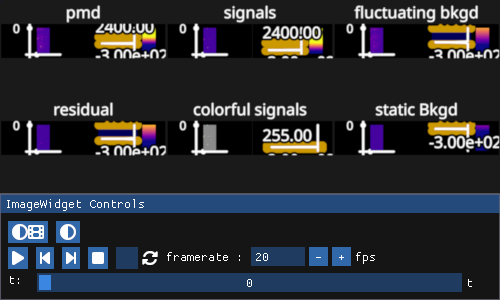

In [14]:
iw = masknmf.visualization.make_demixing_video(
    results_p10["pmd_demixer"].results,
    'cuda',
    show_histogram = True,
    v_range = [-300, 2400],
)
iw.show()

In [58]:
iw.close()